# Task 3.0.2 – Recap: Model Training

In [1]:
import pandas as pd

df = pd.read_csv('./data/lfw_people.csv', index_col = 0)

In [2]:
df['target'] = df['target'].astype('category')

target_names = df['target'].cat.categories

df['target'] = df['target'].cat.codes

df.head()

,0,1,2,3,4,5,6,7,8,9,...,1841,1842,1843,1844,1845,1846,1847,1848,1849,target
0,254.000000,254.000000,251.666670,240.333330,185.333330,144.000000,174.00000,196.66667,196.00000,192.333330,...,100.000000,99.000000,95.666664,92.333336,90.666664,89.666664,87.333336,88.666664,86.666664,5
1,39.666668,50.333332,47.000000,54.666668,99.000000,120.666664,139.66667,157.66667,171.00000,177.666670,...,59.666668,73.333336,77.666664,83.666664,103.333336,123.000000,117.666664,115.000000,133.666670,6
2,89.333336,104.000000,126.000000,141.333330,152.000000,155.333330,155.33333,160.00000,163.00000,166.666670,...,111.666664,100.333336,106.666664,125.000000,117.666664,125.000000,175.333330,183.333330,183.000000,3
3,16.666666,7.666666,7.000000,6.000000,16.333334,70.000000,170.00000,169.66667,161.00000,106.333336,...,190.000000,230.000000,238.000000,239.333330,233.666670,134.000000,27.666666,38.000000,51.333332,1
4,122.666664,121.000000,126.666664,129.333330,129.333330,134.666670,142.00000,142.66667,147.33333,152.000000,...,17.666666,6.666666,5.666666,5.666666,10.333333,10.666667,22.000000,61.666668,70.666664,0


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

def print_face(image):   
    plt.figure(figsize=(4,3))
    plt.imshow(np.reshape(image, (50,37)), cmap=plt.cm.gray)

### Task 3.0.2-1:  PCA

1. Split data into a 75% training set and a 25% test set using `train_test_split`.
* Compute a PCA on the training dataset and extract 150 features. *Note: use `svd_solver='randomized'` and `whiten=True`*

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150, svd_solver='randomized', whiten=True).fit(X_train)

In [7]:
# The PCA components act as the top 150 eigenfaces
eigenfaces = pca.components_

eigenfaces.shape

(150, 1850)

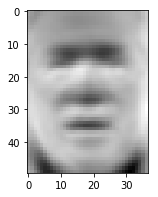

In [8]:
print_face(eigenfaces[5])

## What are Eigenfaces?

Eigenfaces is the name given to a set of eigenvectors when they are used in the computer vision problem of human face recognition. This approach for face recognition was developed in the late 1980's and is still used today.

The eigenfaces themselves form a basis set of all images which is generated by performing a principal component analysis (PCA). This produces dimension reduction by allowing the smaller set of basis images to represent the original training images. Classification can be achieved by comparing how faces are represented by the basis set.

In [9]:
# Projecting the input data on the eigenfaces orthonormal basis
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [10]:
X_train_pca.shape

(966, 150)

In [11]:
X_test_pca.shape

(322, 150)

### Task 3.0.2-2:  Model Training and Evaluation

1. Train a SVM classification model using a `GridSearchCV` with the following grid:
```python
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
                 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1] }
```
* Evaluate the model's performance.

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Train a SVM classification model
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)

# Best estimator found by grid search
print(clf.best_estimator_)

SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [13]:
from sklearn.metrics import confusion_matrix

# Quantitative evaluation of the model quality on the test set
y_pred = clf.predict(X_test_pca)

print("Accuracy:", clf.score(X_test_pca, y_test))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8167701863354038
[[ 20   4   0   2   2   0   0]
 [  1  51   2   4   0   1   4]
 [  0   2  19   3   0   0   0]
 [  1   8   6 115   1   0   1]
 [  0   0   1   1  16   0   2]
 [  0   0   0   3   3  16   0]
 [  0   1   1   2   3   0  26]]


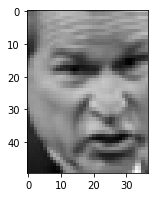

In [14]:
print_face(X_test.iloc[0, :].astype('float').values)

In [15]:
print("True: ", target_names[y_test.iloc[0]])
print("Pred: ", target_names[y_pred[0]])

True:  George W Bush
Pred:  George W Bush
